# Normal distribution from quantiles

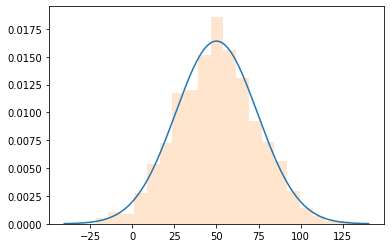

In [1]:
from scipy.stats import lognorm, norm
import numpy as np
import matplotlib.pyplot as plt

def plotPDF(ax, dist):
    """ Plot the PDF of a distribution to an axis. """
    minx, maxx = dist.ppf(0.0001), dist.ppf(0.9999)
    x = np.linspace(minx, maxx, 10000)
    ax.plot(x, dist.pdf(x))

def createNormFromPercent(x1, p1, x2, p2):
    p1ppf = norm.ppf(p1)
    p2ppf = norm.ppf(p2)
    location = ((x1 * p2ppf) - (x2 * p1ppf)) / (p2ppf - p1ppf)
    scale = (x2 - x1) / (p2ppf - p1ppf)
    return norm(loc=location, scale=scale)

def sampleNormFromPercentiles(
        p1, p2,
        x1, x2,
        num_samples = 10**3
    ):
    ## calculate the inverse of the CFD
    cdf_inv_p1 = norm.ppf(p1)
    cdf_inv_p2 = norm.ppf(p2)
    ## calculate mean of the normal distribution
    norm_mean = (
            (x1 * cdf_inv_p2) - (x2 * cdf_inv_p1)
        ) / (cdf_inv_p2 - cdf_inv_p1)
    ## calculate standard deviation of the normal distribution
    norm_std = (x2 - x1) / (cdf_inv_p2 - cdf_inv_p1)
    ## return sampled points
    return norm(loc=norm_mean, scale=norm_std).rvs(size=num_samples)

my_norm = createNormFromPercent(
    10, 0.05,
    90, 0.95
)

fig, ax = plt.subplots(figsize=(6, 4))
plotPDF(ax, my_norm)
ax.hist(
    sampleNormFromPercentiles(
        0.05, 0.95,
        10, 90,
        10**3
    ),
    bins=20, density=True, histtype='stepfilled', alpha=0.2
)
plt.show()

# Subsetting bimodal distribution

 
[1.03702146 0.2043396  0.07001003]


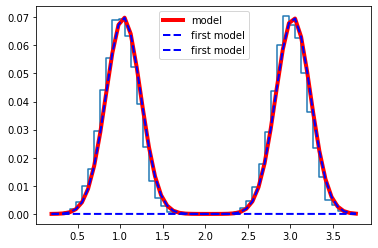

In [106]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
from scipy.optimize import curve_fit

def gauss(x, mu, sigma, A):
    return A * exp( -(x - mu)**2 / (2 * sigma**2) )

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x, mu1, sigma1, A1) + gauss(x, mu2, sigma2, A2)

input_params = [
    1, 0.2,
    3, 0.2
]
# data = normal(*input_params[:2], 10**4)
data = concatenate((
    normal(*input_params[:2], 10**4),
    normal(*input_params[2:], 10**4)
))

## initialise figure
fig, ax = plt.subplots()
## calculate density of data
y, x = np.histogram(data, bins=50, density=True)
## shift data
y_norm = np.append(0, y / y.sum())
## plot data
ax.plot(x, y_norm, drawstyle="steps")

fit_params, fit_cov = curve_fit(
    bimodal,
    x, y_norm,
    bounds = ( 0, (
        2, 0.5, 1,
        5, 0.5, 1
    ) ),
    maxfev = 10**4
)
fit_error = sqrt(diag(fit_cov))
plot(x, bimodal(x, *fit_params),   color='red',  ls="-",  lw=4, label='model')
plot(x, gauss(x, *fit_params[:3]), color='blue', ls="--", lw=2, label='first model')
plot(x, gauss(x, *fit_params[3:]), color='blue', ls="--", lw=2, label='first model')
legend()
print(" ")
print(fit_params[:3])

In [5]:
from the_useful_library import *

def N_crit_k_eta(Pm, num_samples):
    a0 = sampleGaussFromQuantiles(p1=0.16, p2=0.50, x1=1.07502, x2=4.38288, num_samples=num_samples)
    a1 = sampleGaussFromQuantiles(p1=0.16, p2=0.50, x1=0.32331, x2=0.53283, num_samples=num_samples)
    return a0 * (Pm)**(a1)

print([
    N_crit_k_eta(Pm, 1)
    for Pm in [10, 5, 3, 1]
])


[array([7.49159118]), array([8.43611506]), array([1.34702896]), array([2.87001585])]


In [4]:
import numpy as np

list_Lk = [
    3.90 * 10**(10),
    6.58 * 10**(10),
    8.48 * 10**(10),
    1.07 * 10**(11),
    1.31 * 10**(11),
    1.64 * 10**(11),
    1.00 * 10**(11)
]

list_shell_R = [ 40, 60, 80, 100, 120, 140, 160]
list_counts = [ 793, 1882, 2428, 2652, 2638, 2410, 1809 ]

for shell_index in range(len(list_shell_R)):
    Lk = list_Lk[shell_index]
    counts = list_counts[shell_index]
    R = list_shell_R[shell_index]
    print("{:0.2e} \\\\".format(
        Lk * counts / (4*np.pi * R**2)
    ))

1.54e+09 \\
2.74e+09 \\
2.56e+09 \\
2.26e+09 \\
1.91e+09 \\
1.60e+09 \\
5.62e+08 \\


In [1]:
import numpy as np
from scipy.optimize import fsolve
from scipy.special import k0, k1
import functools

In [2]:
def k_ratio_implicit(x, a1):
    ''' implicit peak scale of the magnetic spectra model (Kulsrud and Anderson 1992)
        from: y'= 0
        ->  k_ratio = k_p / k_eta
                    = alpha * K0(k_ratio) / K1(k_ratio)
        ->  x = a1 * K0(x) / K1(x)
        ->  0 = x - a1 * K0(x) / K1(x)
    '''
    return x - a1 * k0(x) / k1(x)

In [8]:
alpha = 1.5
k_ratio = fsolve(
    functools.partial(
        k_ratio_implicit,
        a1=alpha
    ),
    x0 = alpha # give a guess
)[0]
print(k_ratio)

1.0675431770161805
